# Forward Curve Valdidation

## Data retrieving

In [180]:
# import des libs
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import re
import os
from os import *
from os.path import *
import xlwings as xw
from xlwings import Range 
import warnings
warnings.filterwarnings('ignore')

In [181]:
os.chdir(r'C:\Users\rmolli\Desktop\Power-Europe\Data')
markit_fr = pd.read_csv(r"Data Mark-It Raw 07.csv")
markit_fr = markit_fr[['ns1:ValuationDate','ns1:Currency',
       'ns1:Underlying', 'ns1:Underlying1', 'ns1:Underlying2', 
       'ns1:ClientPrice', 'ns1:CompositePrice', 'ns1:ConsensusPrice',
       'ns1:EndDate',
       'ns1:KurtosisPrice', 'ns1:NumberAcceptedPrice',
       'ns1:Period','ns1:RangePrice', 'ns1:SkewnessPrice',
       'ns1:StandardDeviationPrice', 'ns1:StartDate']]

In [182]:
markit_fr.head(5)

,ns1:ValuationDate,ns1:Currency,ns1:Underlying,ns1:Underlying1,ns1:Underlying2,ns1:ClientPrice,ns1:CompositePrice,ns1:ConsensusPrice,ns1:EndDate,ns1:KurtosisPrice,ns1:NumberAcceptedPrice,ns1:Period,ns1:RangePrice,ns1:SkewnessPrice,ns1:StandardDeviationPrice,ns1:StartDate
0,2022-07-01 00:00:00,EUR,BELGIAN / DUTCH BASELOAD IMPLIED SPREAD,BELGIAN POWER - BASELOAD,DUTCH POWER - BASELOAD,10.000000,8.111943,7.405489,2022-08-31 00:00:00,-1.443454,10.0,Month,5.00000,0.316690,1.823543,2022-08-01 00:00:00
1,2022-07-01 00:00:00,EUR,BELGIAN / DUTCH BASELOAD IMPLIED SPREAD,BELGIAN POWER - BASELOAD,DUTCH POWER - BASELOAD,2.333333,0.495048,0.231446,2022-09-30 00:00:00,-0.471144,11.0,Month,6.49968,-0.491115,1.904612,2022-09-01 00:00:00
2,2022-07-01 00:00:00,EUR,BELGIAN / DUTCH BASELOAD IMPLIED SPREAD,BELGIAN POWER - BASELOAD,DUTCH POWER - BASELOAD,-3.485330,-2.633033,-3.498580,2022-10-31 00:00:00,0.248599,11.0,Month,30.95250,0.100732,7.977761,2022-10-01 00:00:00
3,2022-07-01 00:00:00,EUR,BELGIAN / DUTCH BASELOAD IMPLIED SPREAD,BELGIAN POWER - BASELOAD,DUTCH POWER - BASELOAD,-4.315191,-1.784644,-4.080336,2022-11-30 00:00:00,-0.449243,11.0,Month,17.42000,-0.096793,4.809970,2022-11-01 00:00:00
4,2022-07-01 00:00:00,EUR,BELGIAN / DUTCH BASELOAD IMPLIED SPREAD,BELGIAN POWER - BASELOAD,DUTCH POWER - BASELOAD,1.725837,2.173323,-0.766945,2022-12-31 00:00:00,0.648646,11.0,Month,18.48510,0.534638,4.693925,2022-12-01 00:00:00


In [183]:
markit_fr = markit_fr.loc[(markit_fr['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (markit_fr['ns1:Period'] == 'Quarter' ) & (markit_fr['ns1:ValuationDate'] == '2022-07-01 00:00:00' ) , :] #
markit_fr.dropna(subset=["ns1:StandardDeviationPrice"], inplace  = True)

In [184]:
markit_fr

,ns1:ValuationDate,ns1:Currency,ns1:Underlying,ns1:Underlying1,ns1:Underlying2,ns1:ClientPrice,ns1:CompositePrice,ns1:ConsensusPrice,ns1:EndDate,ns1:KurtosisPrice,ns1:NumberAcceptedPrice,ns1:Period,ns1:RangePrice,ns1:SkewnessPrice,ns1:StandardDeviationPrice,ns1:StartDate
1311,2022-07-01 00:00:00,EUR,FRENCH POWER - BASELOAD,FRENCH POWER - BASELOAD,NaN,751.000000,758.080794,758.114683,2022-12-31 00:00:00,3.614460,12.0,Quarter,49.804348,2.141474,12.758014,2022-10-01 00:00:00
1312,2022-07-01 00:00:00,EUR,FRENCH POWER - BASELOAD,FRENCH POWER - BASELOAD,NaN,640.000000,640.204105,639.953613,2023-03-31 00:00:00,-1.462113,11.0,Quarter,19.161435,-0.658060,7.534001,2023-01-01 00:00:00
1313,2022-07-01 00:00:00,EUR,FRENCH POWER - BASELOAD,FRENCH POWER - BASELOAD,NaN,240.142406,237.617016,236.920165,2023-06-30 00:00:00,-1.217340,11.0,Quarter,12.614524,-0.199806,4.058898,2023-04-01 00:00:00
1314,2022-07-01 00:00:00,EUR,FRENCH POWER - BASELOAD,FRENCH POWER - BASELOAD,NaN,235.987484,229.016436,228.287269,2023-09-30 00:00:00,-1.513873,11.0,Quarter,9.627776,-0.191261,3.541402,2023-07-01 00:00:00
1315,2022-07-01 00:00:00,EUR,FRENCH POWER - BASELOAD,FRENCH POWER - BASELOAD,NaN,396.099919,383.844235,382.814265,2023-12-31 00:00:00,-0.591623,11.0,Quarter,14.669975,0.779017,4.702209,2023-10-01 00:00:00
1316,2022-07-01 00:00:00,EUR,FRENCH POWER - BASELOAD,FRENCH POWER - BASELOAD,NaN,367.251181,360.332141,359.963628,2024-03-31 00:00:00,-0.917175,10.0,Quarter,34.099230,-0.817578,12.013276,2024-01-01 00:00:00
1317,2022-07-01 00:00:00,EUR,FRENCH POWER - BASELOAD,FRENCH POWER - BASELOAD,NaN,133.436425,130.601480,128.764874,2024-06-30 00:00:00,-1.372143,10.0,Quarter,19.283702,0.115493,6.590905,2024-04-01 00:00:00
1318,2022-07-01 00:00:00,EUR,FRENCH POWER - BASELOAD,FRENCH POWER - BASELOAD,NaN,135.563832,131.189023,129.610511,2024-09-30 00:00:00,-1.316158,10.0,Quarter,17.139003,0.430143,5.990119,2024-07-01 00:00:00
1319,2022-07-01 00:00:00,EUR,FRENCH POWER - BASELOAD,FRENCH POWER - BASELOAD,NaN,220.538645,221.669236,219.058405,2024-12-31 00:00:00,-0.301464,9.0,Quarter,13.740517,-0.621798,4.070402,2024-10-01 00:00:00
1320,2022-07-01 00:00:00,EUR,FRENCH POWER - BASELOAD,FRENCH POWER - BASELOAD,NaN,224.295744,227.699116,221.951974,2025-03-31 00:00:00,0.077693,9.0,Quarter,46.046223,0.922161,13.868718,2025-01-01 00:00:00


KeyError: 'ns1:ConsensusPrice'

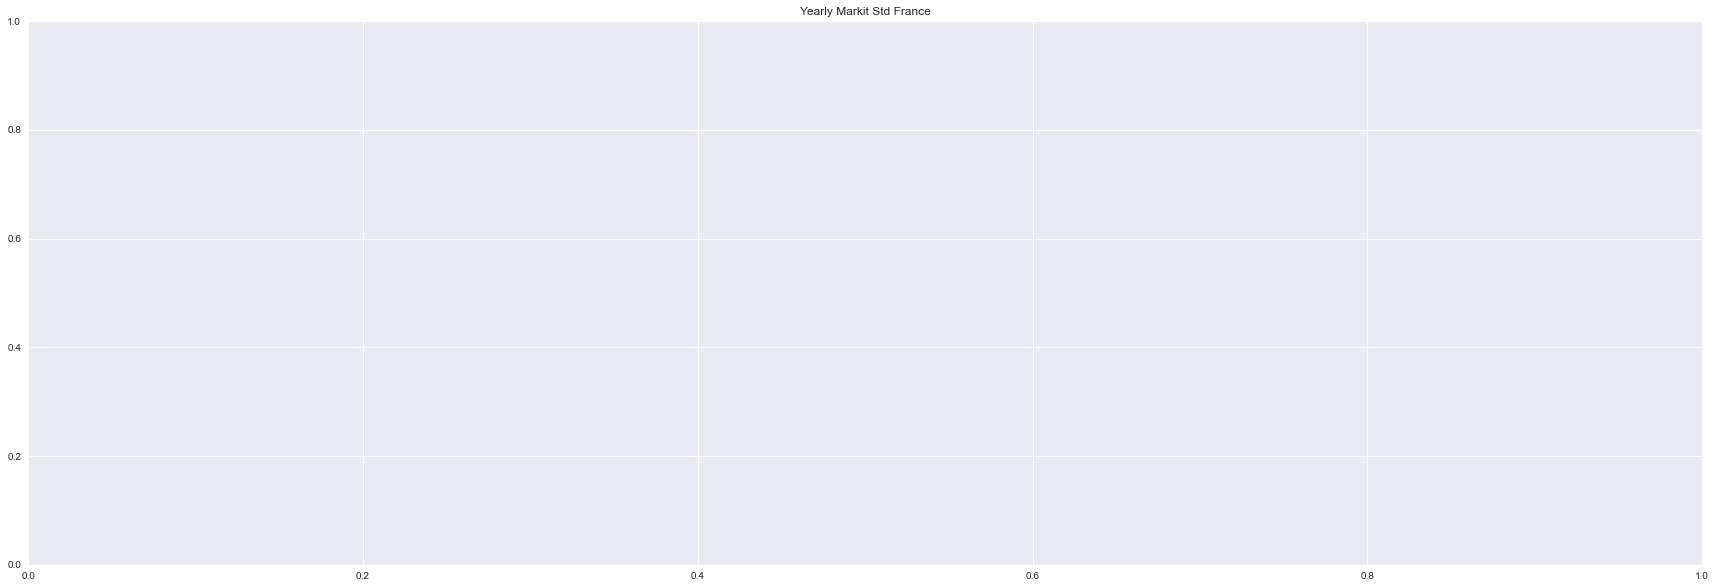

In [185]:
plt.figure(figsize=(30, 10))
plt.title("Yearly Markit Std France")

markit_fr.loc['ns1:ConsensusPrice'].plot(legend = True)
#arkit_fr.loc[''].plot(legend = True)

ax1.set_xlabel("Maturity")
ax1.set_ylabel("Std Dev")

a#x2 = recap_Fra_years.loc['Nb of Prices'].plot(kind = 'bar',secondary_y = True, color = 'teal', width = 0.4, alpha = 0.3, legend = True)